## Classification Model for Kansas

In [2]:
# packages used
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#%run ./graph_counts.py

In [34]:
import matplotlib.pyplot as plt
def graph_counts(dataframe, column, hasSubset, subset_Col, subset_Value, graphType, isPercentage, numShow, savePDF):
    
    '''
        Visualize particular columns in dataframe. 
    
    
       Parameters:
       ----------
       
           dataframe: takes a dataframe as input
           
           column: takes a column of the dataframe as input
           
           hasSubset: takes a boolean as input. Whether to take a subset of the dataframe
           
           subsetCol: takes both a string and 'None'. String for the column name; 'None' if hasSubset is False
           
           subsetValue: takes string, integer and 'None'. String and integer for the subset criteria; 'None' if hasSubset is False
           
           graphType: takes a string as input.Type of graph(bar, pie, hist, area...)
           
           isPercentage: takes a boolean as input. Show the graph in raw counts or percentage
           
           numShow: takes both integer and the string 'all' as input. The number of categories to show; 'all' for all categories
           
           savePDF: takes boolean as input. Whether to save image as a pdf
      
      Return:
      -------
      
          None
          
      '''
    
    #assigin color
    cusColor = 'b'
    if len(set(dataframe.loc[:,'BEERTYPE'])) == 1:
        for each in set(dataframe.loc[:,'BEERTYPE']):
            if each == 'NonLowPoint':
                cusColor = 'blue'
            elif each == 'LowPoint':
                cusColor = 'orange'
               
    else:
        pass

    
    #subset 
    if hasSubset is False:
        col = dataframe.loc[:,str(column)]
    else: 
        subsetCol = str(subset_Col) 
        subsetValue = str(subset_Value)
        
        col = dataframe.loc[dataframe[subsetCol]==subsetValue, str(column)]
        
        if subsetValue == 'NonLowPoint':
            cusColor = 'blue'
        elif subsetValue == 'LowPoint':
            cusColor = 'orange'    
    
    #show percentage or raw value
    if isPercentage:
        value_count = col.value_counts()/sum(col.value_counts())
        plt_title = 'Percentage of Each by ' + str(column)

    else:
        value_count = col.value_counts()
        plt_title = 'Raw Count of Each by' + str(column)
    
    #number of categories
    if str(numShow) != 'all':
        value_count = value_count.head(numShow)

        
    #type of graph   
    if str(graphType) == 'bar':
        value_count.plot.bar(title = plt_title, color = cusColor)
        plt.savefig('figure.pdf')
        #plt.close()
    elif str(graphType) == 'pie':
        fig = value_count.plot.pie(autopct='%1.1f%%')
        
    elif str(graphType) == 'hist':
        fig = value_count.plot(kind = 'hist', color = cusColor)
        
    elif str(graphType) == 'area':
        fig = value_count.plot.area(color = cusColor)
    plt.title(plt_title)
    
    #save as PDF
    #from matplotlib.backends.backend_pdf import PdfPages
     
    
    if savePDF:
        #plt.savefig('figure.pdf')
        #plt.close()
        pass
    else:
        pass

    
    
 

In [5]:
# Load the data
data_dir = 'Data/'
Stores = pd.read_csv(data_dir + 'AllStoresKansas.csv', dtype = str)
StoreType = pd.read_csv(data_dir + 'NonLowPointStoresKansas.csv', dtype = str)
KansasCounties = pd.read_csv(data_dir + 'KansasCounties.csv', dtype = str)

In [6]:
Stores.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG
0,101403888,SEDGWICK,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y
1,100091604,SALINE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
2,200697901,SEDGWICK,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
3,100091143,HARPER,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N
4,107381463,DOUGLAS,OFF,GROCERY,SUPERMARKET-NATURAL/GOURMET FOODS,Y,N


In [7]:
StoreType.head()

,RTL_STORE_CD,BEERTYPE
0,201919318,NonLowPoint
1,205526360,NonLowPoint
2,100765511,NonLowPoint
3,101868466,NonLowPoint
4,103714116,NonLowPoint


In [8]:
FullData = pd.merge(Stores, StoreType, on="RTL_STORE_CD", how="left")

In [9]:
FullData.loc[FullData['BEERTYPE'].isnull(),"BEERTYPE"] = "LowPoint"

In [10]:
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_FIPS_COUNTY_DSC'],prefix='COUNTY')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_PREMISE_TYPE_CD'],prefix='PREMISE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_CHANNEL_DSC'],prefix='CHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_SUBCHANNEL_DSC'],prefix='SUBCHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_BEER_FLAG'],prefix='BEER_LICENSE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_LIQUOR_FLG'],prefix='LIQUOR_LICENSE')], axis=1)
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ALLEN,COUNTY_ANDERSON,...,SUBCHANNEL_SUPERMARKET-NATURAL/GOURMET FOODS,SUBCHANNEL_THEATER,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINE SPECIALTY STORE,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y
0,101403888,SEDGWICK,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,0,0,0,0,1,0,0,1
1,100091604,SALINE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
2,200697901,SEDGWICK,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
3,100091143,HARPER,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
4,107381463,DOUGLAS,OFF,GROCERY,SUPERMARKET-NATURAL/GOURMET FOODS,Y,N,LowPoint,0,0,...,1,0,0,0,0,0,1,1,0,0


In [11]:
KansasCounties = pd.DataFrame(KansasCounties)

In [12]:
RulesData = pd.merge(FullData, KansasCounties, left_on="RTL_FIPS_COUNTY_DSC", right_on='COUNTY' , how="left")

In [13]:
RulesData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ALLEN,COUNTY_ANDERSON,...,SUBCHANNEL_WINE SPECIALTY STORE,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,COUNTY,STATE,STATUS
0,101403888,SEDGWICK,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,0,1,0,0,1,SEDGWICK,KANSAS,WET
1,100091604,SALINE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,1,1,0,0,SALINE,KANSAS,WET
2,200697901,SEDGWICK,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,1,1,0,0,SEDGWICK,KANSAS,WET
3,100091143,HARPER,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,0,0,...,0,0,0,1,1,0,0,HARPER,KANSAS,MIXED
4,107381463,DOUGLAS,OFF,GROCERY,SUPERMARKET-NATURAL/GOURMET FOODS,Y,N,LowPoint,0,0,...,0,0,0,1,1,0,0,DOUGLAS,KANSAS,WET


In [14]:
RulesData.to_csv(data_dir + 'RulesDataKansas.csv')

## Business Rules Classification

In [15]:
RulesData['PREDICTION'] = ""
RulesData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ALLEN,COUNTY_ANDERSON,...,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,COUNTY,STATE,STATUS,PREDICTION
0,101403888,SEDGWICK,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,0,0,...,0,0,1,0,0,1,SEDGWICK,KANSAS,WET,
1,100091604,SALINE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,1,1,0,0,SALINE,KANSAS,WET,
2,200697901,SEDGWICK,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,1,1,0,0,SEDGWICK,KANSAS,WET,
3,100091143,HARPER,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,0,0,...,0,0,1,1,0,0,HARPER,KANSAS,MIXED,
4,107381463,DOUGLAS,OFF,GROCERY,SUPERMARKET-NATURAL/GOURMET FOODS,Y,N,LowPoint,0,0,...,0,0,1,1,0,0,DOUGLAS,KANSAS,WET,


In [16]:
#find all the dry counties
dry_county_list = list(KansasCounties.loc[KansasCounties['STATUS'] == 'DRY','COUNTY'])


#### Rules

In [17]:
for row in range(len(RulesData)):
    if RulesData.loc[row,'RTL_PREMISE_TYPE_CD'] == 'OFF':
        if RulesData.loc[row,'RTL_CHANNEL_DSC'] == 'LIQUOR':
            RulesData.loc[row,'PREDICTION'] = 'NonLowPoint'
        elif RulesData.loc[row,'RTL_CHANNEL_DSC'] == 'MILITARY OFF-PREMISE':
            RulesData.loc[row,'PREDICTION'] = 'NonLowPoint'    
        else:
            RulesData.loc[row,'PREDICTION'] = 'LowPoint'
    elif RulesData.loc[row,'RTL_PREMISE_TYPE_CD'] == 'ON':
        if RulesData.loc[row,'RTL_FIPS_COUNTY_DSC'] in dry_county_list:
            RulesData.loc[row,'PREDICTION'] = 'LowPoint'
        else:
            if RulesData.loc[row,'RTL_BEER_FLAG'] == 'Y':
                if RulesData.loc[row,'RTL_LIQUOR_FLG'] == 'Y':
                    RulesData.loc[row,'PREDICTION'] = 'NonLowPoint'
                else:
                    RulesData.loc[row,'PREDICTION'] = 'LowPoint'
            else:
                RulesData.loc[row,'PREDICTION'] = 'LowPoint'      
    else:
        RulesData.loc[row,'PREDICTION'] = 'NonLowPoint'

In [18]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(RulesData)):
    if RulesData.ix[index , 'BEERTYPE'] != RulesData.ix[index , 'PREDICTION']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

there are 206 errors in the prediction


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [19]:
#check the error predictions
error_df = RulesData.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
false_NonLowPoint.head()

there are 119 false_NonLowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ALLEN,COUNTY_ANDERSON,...,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,COUNTY,STATE,STATUS,PREDICTION
5,201953385,NEOSHO,ON,DINING,CASUAL DINING,Y,Y,LowPoint,0,0,...,0,0,1,0,0,1,NEOSHO,KANSAS,MIXED,NonLowPoint
8,201644381,STEVENS,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,LowPoint,0,0,...,0,0,1,0,0,1,STEVENS,KANSAS,WET,NonLowPoint
23,101907187,GEARY,ON,MILITARY ON-PREMISE,MILITARY FOOD SERVICE,Y,Y,LowPoint,0,0,...,0,0,1,0,0,1,GEARY,KANSAS,WET,NonLowPoint
55,201989706,KINGMAN,ON,DINING,CASUAL DINING,Y,Y,LowPoint,0,0,...,0,0,1,0,0,1,KINGMAN,KANSAS,MIXED,NonLowPoint
66,202912930,CRAWFORD,ON,BAR/NIGHTCLUB,NEIGHBORHOOD BAR,Y,Y,LowPoint,0,0,...,0,0,1,0,0,1,CRAWFORD,KANSAS,WET,NonLowPoint


In [20]:
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_LowPoint.head()

there are 87 false_LowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ALLEN,COUNTY_ANDERSON,...,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,COUNTY,STATE,STATUS,PREDICTION
22,105527771,JOHNSON,ON,DINING,CASUAL DINING,Y,N,NonLowPoint,0,0,...,0,0,1,1,0,0,JOHNSON,KANSAS,MIXED,LowPoint
72,100683776,MIAMI,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,0,0,...,0,0,1,1,0,0,MIAMI,KANSAS,MIXED,LowPoint
78,200468114,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,0,0,...,0,0,1,1,0,0,BUTLER,KANSAS,MIXED,LowPoint
94,201990354,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,0,0,...,0,0,1,1,0,0,BUTLER,KANSAS,MIXED,LowPoint
154,201403677,JEFFERSON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,0,0,...,0,0,1,1,0,0,JEFFERSON,KANSAS,MIXED,LowPoint


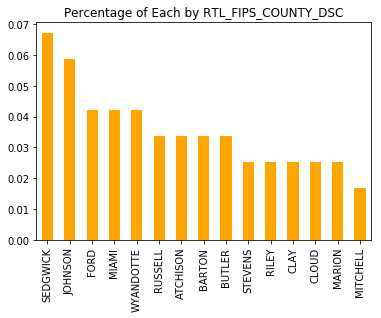

In [35]:
#create false_NonLowPoint by County
graph_counts(false_NonLowPoint, 'RTL_FIPS_COUNTY_DSC', False, None, None, 'bar', True, 15, True)

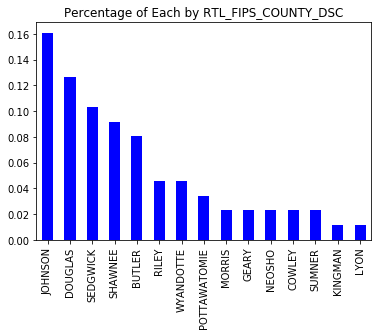

In [32]:
#create false_LowPoint by County
graph_counts(false_LowPoint, 'RTL_FIPS_COUNTY_DSC', False, 'bar', True, 15)

In [50]:
#explore what happens to Johnson
tempColumns = ['RTL_STORE_CD', 'RTL_FIPS_COUNTY_DSC', 'RTL_PREMISE_TYPE_CD', 'RTL_CHANNEL_DSC', 'RTL_SUBCHANNEL_DSC', 'RTL_BEER_FLAG', 'RTL_LIQUOR_FLG', 'STATUS', 'PREDICTION']
false_LowPoint.loc[false_LowPoint['RTL_FIPS_COUNTY_DSC'] == 'JOHNSON', tempColumns]

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,STATUS,PREDICTION
22,105527771,JOHNSON,ON,DINING,CASUAL DINING,Y,N,MIXED,LowPoint
406,101733471,JOHNSON,ON,DINING,CASUAL DINING,Y,N,MIXED,LowPoint
460,207493514,JOHNSON,ON,RECREATION,BILLIARD/BOWLING/ARCADE,Y,N,MIXED,LowPoint
468,107183591,JOHNSON,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,MIXED,LowPoint
565,100478029,JOHNSON,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,MIXED,LowPoint
670,107303799,JOHNSON,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,MIXED,LowPoint
782,103752286,JOHNSON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
1425,201934980,JOHNSON,OFF,EXTENDED MASTER OFF-PREMISE,ETHNIC MARKETS,N,N,MIXED,LowPoint
1986,101430430,JOHNSON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
2228,107388530,JOHNSON,ON,DINING,CASUAL DINING,Y,N,MIXED,LowPoint


In [51]:
false_LowPoint.loc[false_LowPoint['RTL_PREMISE_TYPE_CD'] == 'OFF', tempColumns] 

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,STATUS,PREDICTION
72,100683776,MIAMI,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
78,200468114,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
94,201990354,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
154,201403677,JEFFERSON,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,MIXED,LowPoint
192,107371287,CLAY,OFF,EXTENDED MASTER OFF-PREMISE,OFFICE BUILDING,N,N,MIXED,LowPoint
199,107413566,CHEROKEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,WET,LowPoint
283,100417743,NEOSHO,OFF,GROCERY,SUPERCENTER,Y,N,MIXED,LowPoint
367,107342731,DOUGLAS,OFF,EXTENDED MASTER OFF-PREMISE,OTHER OFF-PREMISE,N,N,WET,LowPoint
468,107183591,JOHNSON,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,MIXED,LowPoint
565,100478029,JOHNSON,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,MIXED,LowPoint


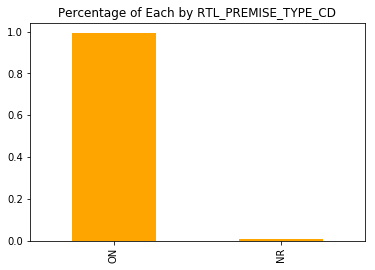

In [33]:
#create false_NonLowPoint by premise type
graph_counts(false_NonLowPoint, 'RTL_PREMISE_TYPE_CD', False, 'bar', True, 15)

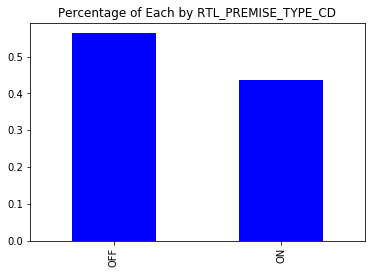

In [34]:
#create false_LowPoint by premise type
graph_counts(false_LowPoint, 'RTL_PREMISE_TYPE_CD', False, 'bar', True, 15)

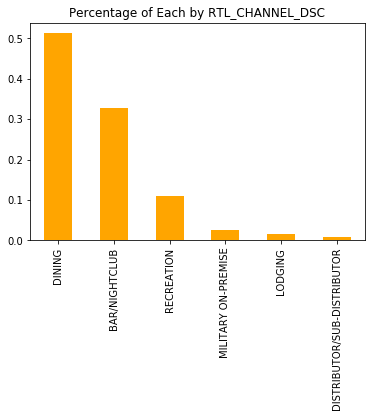

In [35]:
#create false_NonLowPoint by Channel
graph_counts(false_NonLowPoint, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

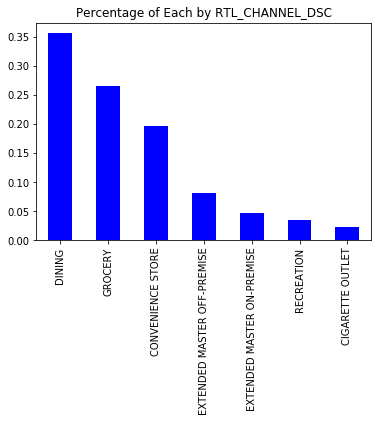

In [36]:
#create false_LowPoint by Channel
graph_counts(false_LowPoint, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

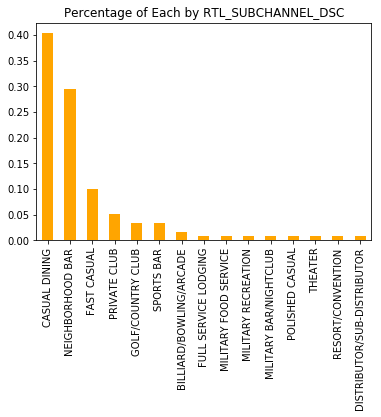

In [37]:
#create false_NonLowPoint by sub channel
graph_counts(false_NonLowPoint, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 15)

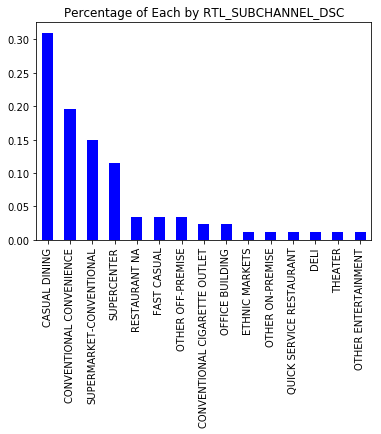

In [38]:
#create false_LowPoint by sub channel
graph_counts(false_LowPoint, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 15)

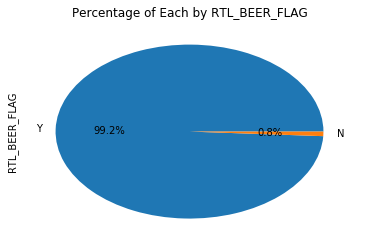

In [39]:
#create false_NonLowPoint by Beer License
graph_counts(false_NonLowPoint, 'RTL_BEER_FLAG', False, 'pie', True, 15)

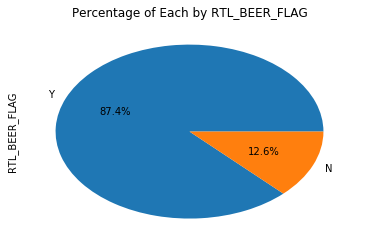

In [40]:
#create false_LowPoint by Beer License
graph_counts(false_LowPoint, 'RTL_BEER_FLAG', False, 'pie', True, 15)

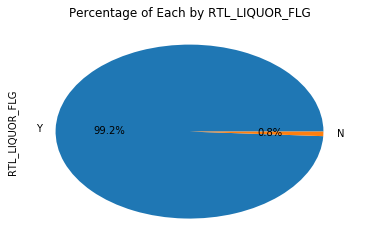

In [41]:
#create false_NonLowPoint by Liquor License
graph_counts(false_NonLowPoint, 'RTL_LIQUOR_FLG', False, 'pie', True, 15)

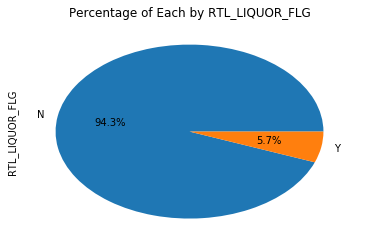

In [42]:
#create false_LowPoint by Liquor License
graph_counts(false_LowPoint, 'RTL_LIQUOR_FLG', False, 'pie', True, 15)

End of business rule

In [25]:
# Confusion Matrix
cm = confusion_matrix(RulesData['BEERTYPE'], RulesData['PREDICTION'])
cm

array([[1380,  119],
       [  87, 1049]])

In [26]:
# True Positive Rate
TPR = cm[1,1]/(cm[1,1]+cm[1,0])
TPR

0.9234154929577465

In [27]:
# False Negative Rate
FNR = cm[1,0]/(cm[1,0]+cm[1,1])
FNR

0.076584507042253516

In [28]:
# True Negative Rate
TNR = cm[0,0]/(cm[0,0]+cm[0,1])
TNR

0.92061374249499661

In [29]:
# False Positive Rate
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
FPR

0.079386257505003333

In [30]:
Accuracy = (cm[0,0] + cm[1,1])/ np.sum(cm)
Accuracy

0.92182163187855792

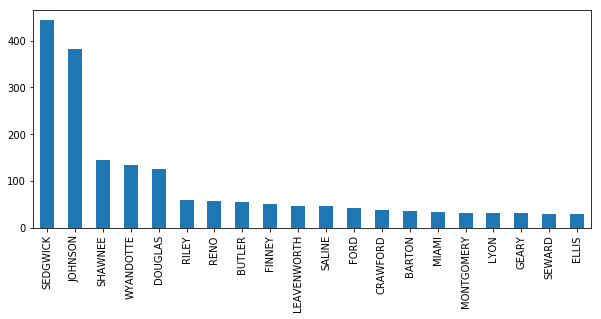

In [8]:
# Total Number of Stores by County
County = FullData.loc[:,'RTL_FIPS_COUNTY_DSC']
County = County.value_counts().head(20)
County.plot.bar(figsize=(10,4))

Total Stores in Kansas  2635
Total Low Point Stores in Kansas  1499
Total Non Low Point Stores in Kansas  1136


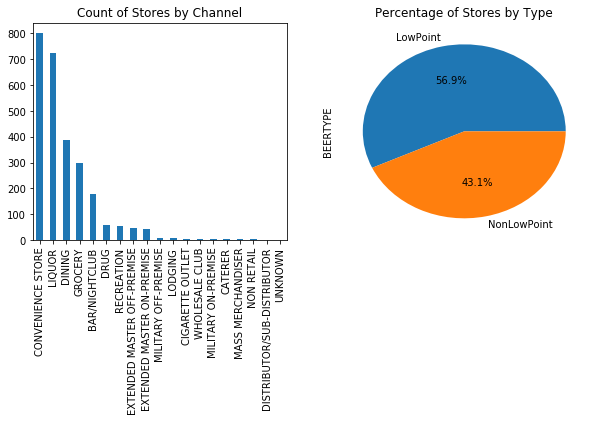

In [9]:
# Total Number Counts of Stores by Trade Channel
Channel = FullData.loc[:,'RTL_CHANNEL_DSC'].value_counts()
Type = FullData.loc[:,'BEERTYPE'].value_counts()

print("Total Stores in Kansas ",len(FullData))
print("Total Low Point Stores in Kansas ",len(FullData.loc[FullData["BEERTYPE"]=="LowPoint",:]))
print("Total Non Low Point Stores in Kansas ",len(FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",:]))

#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

Channel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Count of Stores by Channel')
Type.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of Stores by Type')


In [10]:
# Count number of stores per channel
LowPointChannel =FullData.loc[FullData["BEERTYPE"]=="LowPoint",'RTL_CHANNEL_DSC'].value_counts()
NonLowPointChannel =FullData.loc[FullData["BEERTYPE"]=="NonLowPoint",'RTL_CHANNEL_DSC'].value_counts()

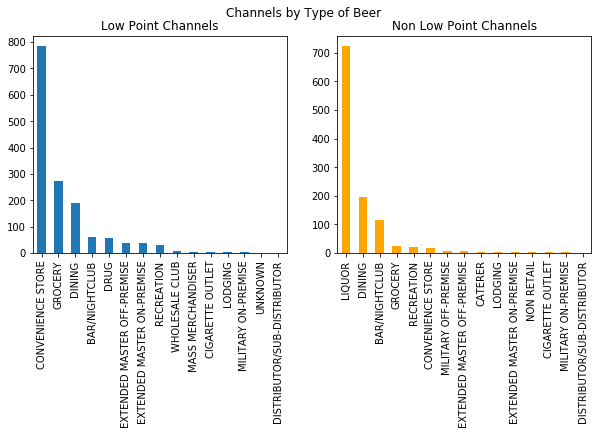

In [11]:
#Plot Channels by Type of Beer
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

LowPointChannel.plot(ax=axes[0], kind='bar'); axes[0].set_title('Low Point Channels')
NonLowPointChannel.plot(ax=axes[1], kind='bar', color = 'orange'); axes[1].set_title('Non Low Point Channels')
fig.suptitle('Channels by Type of Beer')


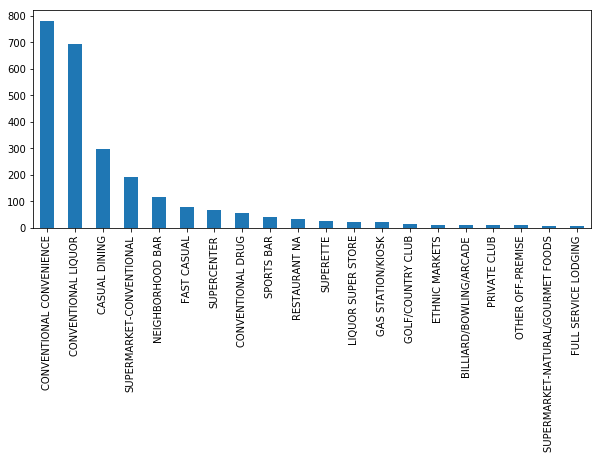

In [12]:
# Total Number of Stores by SubChannel
SubChannel = FullData.loc[:,'RTL_SUBCHANNEL_DSC']
SubChannel = SubChannel.value_counts().head(20)
SubChannel.plot.bar(figsize=(10,4))

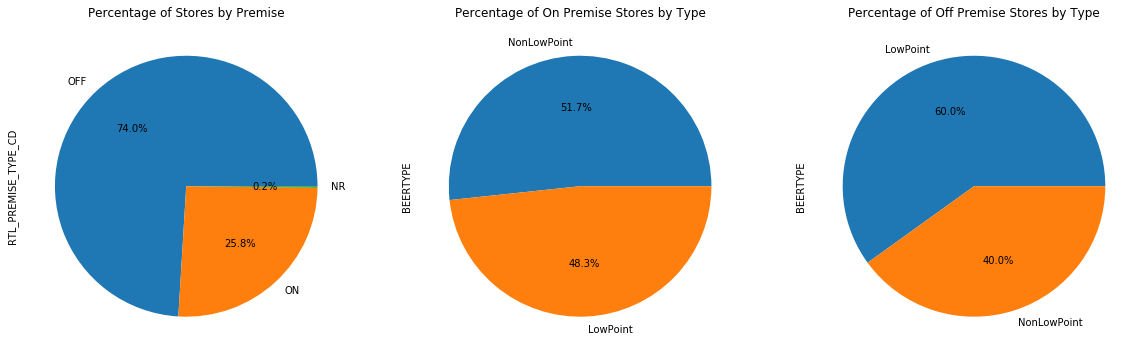

In [60]:
# Percentage of Stores which Off Premise vs On Premise
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

Premise = FullData.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
OnPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="ON",'BEERTYPE'].value_counts()
OffPremiseType = FullData.loc[FullData["RTL_PREMISE_TYPE_CD"]=="OFF",'BEERTYPE'].value_counts()

Premise.plot(ax=axes[0], kind='pie',autopct='%1.1f%%'); axes[0].set_title('Percentage of Stores by Premise')
OnPremiseType.plot(ax=axes[1], kind='pie',autopct='%1.1f%%'); axes[1].set_title('Percentage of On Premise Stores by Type')
OffPremiseType.plot(ax=axes[2], kind='pie',autopct='%1.1f%%'); axes[2].set_title('Percentage of Off Premise Stores by Type')


### Prepare Data

In [14]:
# prepare data to fit model
X_labels = [c for c in FullData.columns if c not in ['RTL_STORE_CD','BEERTYPE','RTL_FIPS_COUNTY_DSC','RTL_PREMISE_TYPE_CD','RTL_CHANNEL_DSC','RTL_SUBCHANNEL_DSC','RTL_BEER_FLAG',"RTL_LIQUOR_FLG"]]
X = FullData.loc[:,X_labels]
Y = FullData['BEERTYPE']

In [15]:
#try to find the best tree depth with min split.

#tree depth

#Fit a classification tree to the data with various values of the parameters max_depth and min_samples_leaf, 
#Report the cross-validation errors associated with different values of these parameters.

# change the parameter depth and compute test error
TreeDepth = range(1,21)
MinLeaf = range(1,21)
results = []
for d in TreeDepth:
    for l in MinLeaf:
        clf = tree.DecisionTreeClassifier(max_depth=d, min_samples_leaf=l,random_state=0)
        clf = clf.fit(X,Y)    
        scores = cross_val_score(clf, X, Y, cv=5)
        results.append((d,l,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','min_sample_leaf','mean','std'])
df_tree_accuracy['depth_leaf']= df_tree_accuracy['depth'].astype(str)+"_"+df_tree_accuracy['min_sample_leaf'].astype(str)

#sort the dataframe
df_tree_accuracy = df_tree_accuracy.sort_values(['mean'], ascending = False)
df_tree_accuracy.head()

,depth,min_sample_leaf,mean,std,depth_leaf
204,11,5,0.950285,0.007333,11_5
200,11,1,0.949904,0.008198,11_1
181,10,2,0.949527,0.008526,10_2
205,11,6,0.949526,0.007053,11_6
364,19,5,0.949147,0.006929,19_5


# Result

In [16]:
#the result: with the best tree depth and accuracy
best_depth = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
best_depth = int(best_depth['depth'])

min_leaf = df_tree_accuracy[df_tree_accuracy['mean'] == max(df_tree_accuracy['mean'])]
min_leaf = int(min_leaf['min_sample_leaf'])
print('the best depth is:', best_depth, 'with min split:',min_leaf ,'with accuracy:',round(max(df_tree_accuracy['mean'])*100, 3), '%')



the best depth is: 11 with min split: 5 with accuracy: 95.029 %


In [17]:
#check the errors:

#create a new data frame to store the prediction result. 
result_df = FullData.loc[:, 'RTL_STORE_CD': 'BEERTYPE']
result_df['PRED_RESULT'] = clf.predict(X)
result_df.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
0,101403888,SEDGWICK,OFF,LIQUOR,CONVENTIONAL LIQUOR,Y,Y,NonLowPoint,NonLowPoint
1,100091604,SALINE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,LowPoint
2,200697901,SEDGWICK,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,LowPoint
3,100091143,HARPER,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,LowPoint
4,107381463,DOUGLAS,OFF,GROCERY,SUPERMARKET-NATURAL/GOURMET FOODS,Y,N,LowPoint,LowPoint


In [18]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(result_df)):
    if result_df.ix[index , 'BEERTYPE'] != result_df.ix[index , 'PRED_RESULT']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

there are 161 errors in the prediction


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [19]:
#check the error predictions
error_df = result_df.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
false_NonLowPoint.head()

there are 39 false_NonLowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
23,101907187,GEARY,ON,MILITARY ON-PREMISE,MILITARY FOOD SERVICE,Y,Y,LowPoint,NonLowPoint
111,100091796,RENO,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,Y,LowPoint,NonLowPoint
145,302192363,SEDGWICK,ON,DINING,CASUAL DINING,Y,Y,LowPoint,NonLowPoint
168,101735995,MONTGOMERY,ON,RECREATION,PRIVATE CLUB,Y,Y,LowPoint,NonLowPoint
185,301621538,JOHNSON,ON,DINING,CASUAL DINING,Y,Y,LowPoint,NonLowPoint


In [20]:
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_LowPoint.head()

there are 122 false_LowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
22,105527771,JOHNSON,ON,DINING,CASUAL DINING,Y,N,NonLowPoint,LowPoint
72,100683776,MIAMI,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,LowPoint
78,200468114,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,LowPoint
82,107308403,FINNEY,ON,DINING,CASUAL DINING,Y,Y,NonLowPoint,LowPoint
94,201990354,BUTLER,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,NonLowPoint,LowPoint


In [21]:
#create statistics for false_NonLowPoint
county_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_NonLowPoint = false_NonLowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

In [22]:
#create statistics for false_LowPoint
county_false_LowPoint = false_LowPoint.loc[:,'RTL_FIPS_COUNTY_DSC'].value_counts().head(15)
premise_false_LowPoint = false_LowPoint.loc[:,'RTL_PREMISE_TYPE_CD'].value_counts()
channel_false_LowPoint = false_LowPoint.loc[:,'RTL_CHANNEL_DSC'].value_counts()
sub_channel_false_LowPoint = false_LowPoint.loc[:,'RTL_SUBCHANNEL_DSC'].value_counts()
beer_license_false_LowPoint = false_LowPoint.loc[:,'RTL_BEER_FLAG'].value_counts()
liquor_license_false_LowPoint = false_LowPoint.loc[:,'RTL_LIQUOR_FLG'].value_counts()

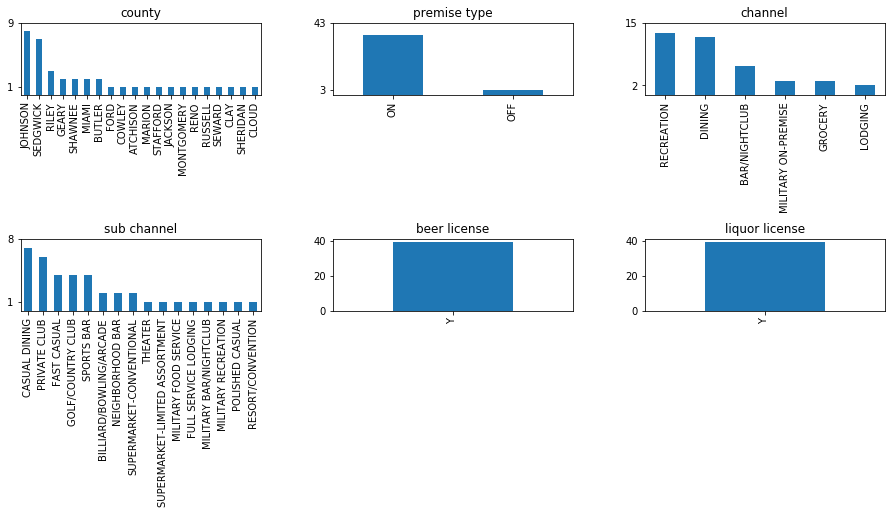

In [34]:
#plot for false_NonLowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_NonLowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_NonLowPoint))])
   
premise_false_NonLowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_NonLowPoint), int(upper_limit*max(premise_false_NonLowPoint))])

channel_false_NonLowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_NonLowPoint), int(upper_limit*max(channel_false_NonLowPoint))])

sub_channel_false_NonLowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_NonLowPoint), int(upper_limit*max(sub_channel_false_NonLowPoint))])

beer_license_false_NonLowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_NonLowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.3, hspace=2)

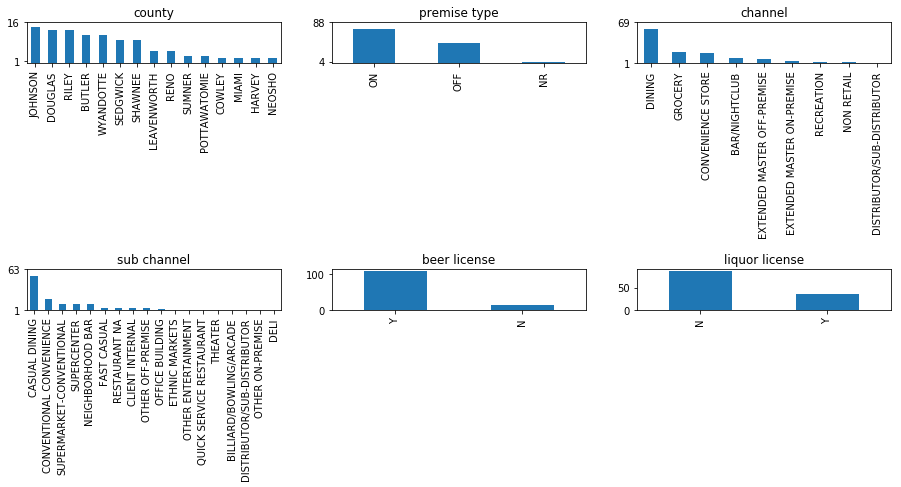

In [32]:
#plot for false_LowPoint
fig, axes = plt.subplots(nrows=2, ncols=3)

bottom_limit = 1
upper_limit = 1.2

county_false_LowPoint.plot(ax=axes[0,0], kind='bar'); axes[0,0].set_title('county')
axes[0,0].set_yticks([bottom_limit*min(county_false_NonLowPoint), int(upper_limit*max(county_false_LowPoint))])
   
premise_false_LowPoint.plot(ax=axes[0,1], kind='bar'); axes[0,1].set_title('premise type')
axes[0,1].set_yticks([bottom_limit*min(premise_false_LowPoint), int(upper_limit*max(premise_false_LowPoint))])

channel_false_LowPoint.plot(ax=axes[0,2], kind='bar'); axes[0,2].set_title('channel')
axes[0,2].set_yticks([bottom_limit*min(channel_false_LowPoint), int(upper_limit*max(channel_false_LowPoint))])

sub_channel_false_LowPoint.plot(ax=axes[1,0], kind='bar'); axes[1,0].set_title('sub channel')
axes[1,0].set_yticks([bottom_limit*min(sub_channel_false_LowPoint), int(upper_limit*max(sub_channel_false_LowPoint))])

beer_license_false_LowPoint.plot(ax=axes[1,1], kind='bar'); axes[1,1].set_title('beer license')

liquor_license_false_LowPoint.plot(ax=axes[1,2], kind='bar'); axes[1,2].set_title('liquor license')

#adjust the plot
plt.subplots_adjust(left=2, bottom=2, right=4, top=3, wspace=0.2, hspace=5)


In [54]:
#feature importance
clf = tree.DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=min_leaf,random_state=0)
clf = clf.fit(X,Y)

#all the features with their importance scores.
feature_score = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending = False)

#only show the features that have scores greater than 0
feature_score[feature_score > 0]


LIQUOR_LICENSE_Y                       0.822187
CHANNEL_LIQUOR                         0.038693
COUNTY_DOUGLAS                         0.023023
COUNTY_SHAWNEE                         0.019458
COUNTY_JOHNSON                         0.018480
COUNTY_SEDGWICK                        0.013052
SUBCHANNEL_CASUAL DINING               0.010100
COUNTY_RILEY                           0.008852
COUNTY_WYANDOTTE                       0.006862
COUNTY_LEAVENWORTH                     0.006772
PREMISE_ON                             0.005707
PREMISE_NR                             0.005210
COUNTY_RENO                            0.004092
PREMISE_OFF                            0.003006
SUBCHANNEL_FAST CASUAL                 0.002702
CHANNEL_CONVENIENCE STORE              0.001847
COUNTY_BUTLER                          0.001756
CHANNEL_BAR/NIGHTCLUB                  0.001662
SUBCHANNEL_SUPERCENTER                 0.001476
CHANNEL_DINING                         0.001454
CHANNEL_EXTENDED MASTER OFF-PREMISE    0

In [63]:
# Confusion Matrix
cm = confusion_matrix(result_df['BEERTYPE'], result_df['PRED_RESULT'])
cm

array([[1460,   39],
       [ 122, 1014]])

In [71]:
# True Positive Rate
TPR = cm[1,1]/(cm[1,1]+cm[1,0])
TPR

0.89260563380281688

In [75]:
# False Negative Rate
FNR = cm[1,0]/(cm[1,0]+cm[1,1])
FNR

0.10739436619718309

In [72]:
# True Negative Rate
TNR = cm[0,0]/(cm[0,0]+cm[0,1])
TNR

0.97398265510340232

In [73]:
# False Positive Rate
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
FPR

0.026017344896597731